In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import numpy as np
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics
from PIL import Image
import PIL.ImageOps   
# Turn on interactive mode. Turn off with plt.ioff()
plt.ion()
%matplotlib inline

In [53]:
base_directory = "../Imagens/OriginalGrayDataset"
target_directory = "../Imagens/ManualSegmentatedGrayDataset"
N_SAMPLE_BY_CLASS = 4

https://scikit-image.org/docs/0.12.x/auto_examples/xx_applications/plot_coins_segmentation.html

https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

https://learnopencv.com/filling-holes-in-an-image-using-opencv-python-c/

In [54]:
def selectRandImages(image_dir,n_sample_by_class = 4):
    folders = os.listdir(image_dir)
    rand_images = {}
    for folder in folders:
        list_images = []
        files = os.listdir(os.path.join(image_dir,folder))
        for sample in range(n_sample_by_class):
            list_images.append(files[np.random.randint(len(files),size=1)[0]])
            list_images.append(files[np.random.randint(len(files),size=1)[0]])
            list_images.append(files[np.random.randint(len(files),size=1)[0]])
            list_images.append(files[np.random.randint(len(files),size=1)[0]])
        rand_images[folder] = list_images
    return rand_images

In [55]:
def plotSample(image_dir,sample_images_dict,columns=4,gray_mode=False,function=None,prefix=None):
    rows = len(rand_sample)
    fig, axes = plt.subplots(rows,columns,figsize=(18,24),constrained_layout=True)
    axes.flatten()
    for i,title in enumerate(sample_images_dict):
        class_dir = os.path.join(image_dir,title)
        for j in range(columns):
            if prefix is None:
                filename = sample_images_dict[title][j]
            else:
                filename = prefix + '_' + sample_images_dict[title][j]
            image=cv2.imread(os.path.join(class_dir,filename),0)
            if function is not None:
                image = function(image)
            if(gray_mode):
                axes[i][j].imshow(image,cmap='gray',norm=NoNorm())
            else:
                axes[i][j].imshow(image)
            axes[i,0].set_ylabel(title,rotation=90,size='large',color="red")
            axes[i][j].set_yticks([])
            axes[i][j].set_xticks([])
    fig.show()
    return

#### Amostra das imagens

In [57]:
rand_sample = selectRandImages(base_directory,N_SAMPLE_BY_CLASS)

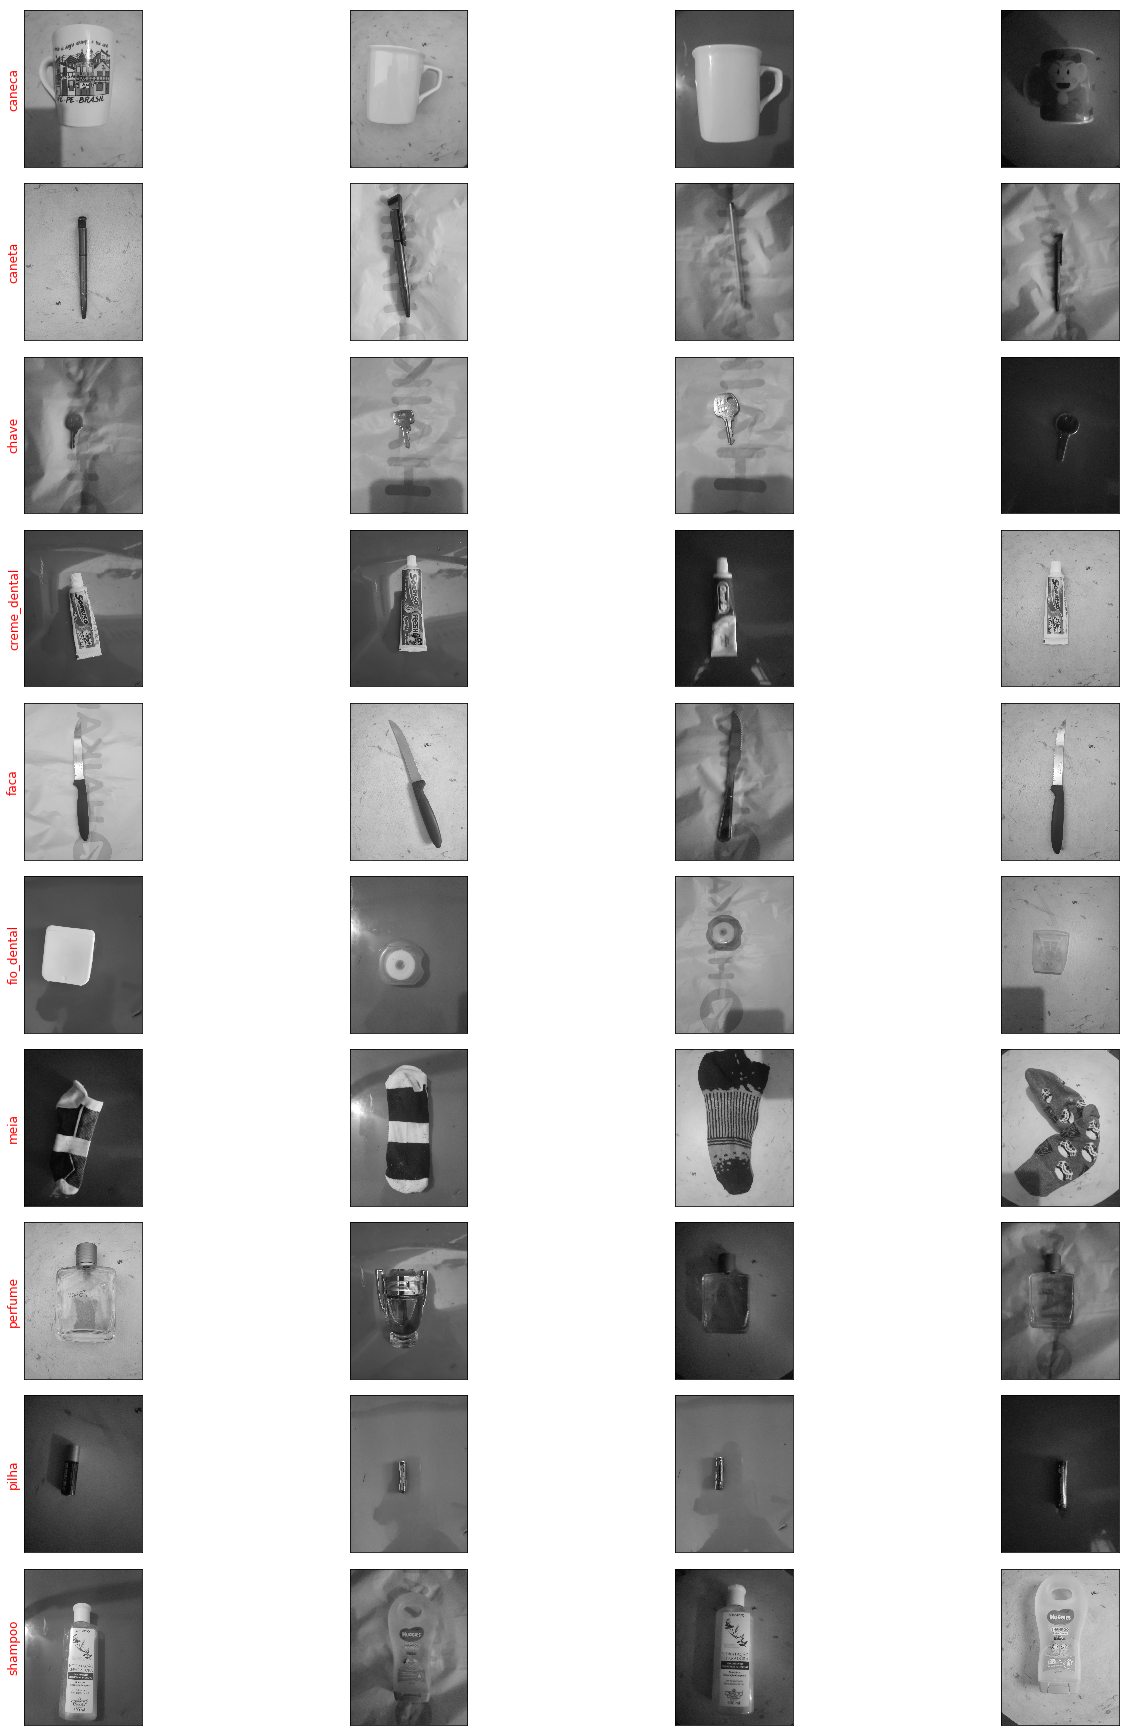

In [58]:
plotSample(base_directory,rand_sample,N_SAMPLE_BY_CLASS,True)

In [59]:
def applyFilter(source_dir,target_dir,function,prefix=None,aux=None):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    classes_dir = os.listdir(source_dir)
    i = 0
    for class_folder in classes_dir:
        target_class_dir = os.path.join(target_dir,class_folder)
        if not os.path.exists(target_class_dir):
            os.makedirs(target_class_dir)
        source_class_dir = os.path.join(source_dir,class_folder)
        files = os.listdir(source_class_dir)
        for f in files:
            image = mpimg.imread(os.path.join(source_class_dir,f))
            if aux is None:
                filtered_image = Image.fromarray(function(image))
            else:
                filtered_image = Image.fromarray(function(image,aux))
            if prefix is None:
                target_filename = f
            else:
                target_filename = prefix + '_' + f
            full_filename = os.path.join(target_class_dir,target_filename)
            #print(full_filename)
            filtered_image.save(full_filename, 'JPEG', quality=95)
            i+=1
    print("Finalizado. {} imagens foram processadas.".format(i))
    return

In [60]:
amostra_classe = 'caneca'
amostra_path = rand_sample[amostra_classe][1]
image=cv2.imread(os.path.join(base_directory,amostra_classe,amostra_path),0)

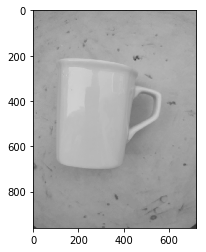

In [61]:
plt.imshow(image,cmap='gray',norm=NoNorm())

result = skimage.filters.thresholding.try_all_threshold(np.invert(image))

In [70]:
def minThresholdFilter(image):
    thresh_min = skimage.filters.thresholding.threshold_li(np.invert(image))
    binary_min = np.uint8(np.invert(image) > thresh_min) * 255
    return binary_min

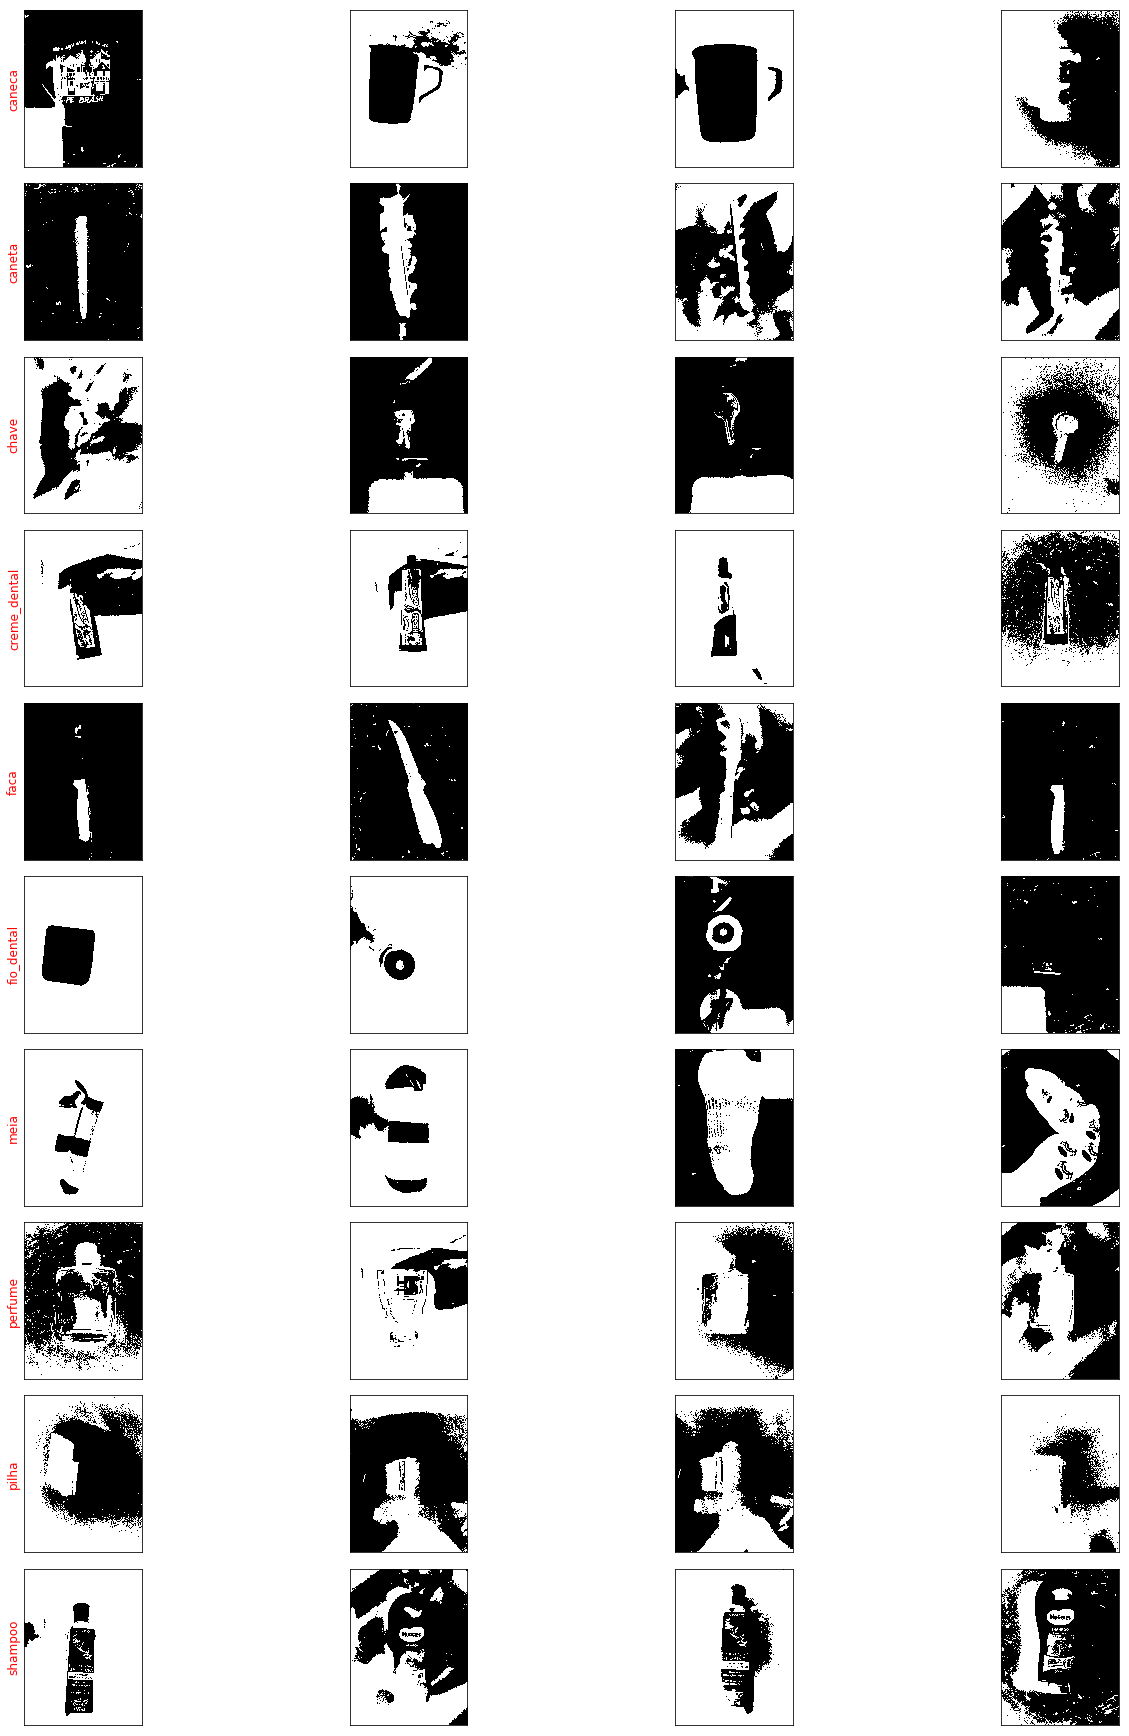

In [71]:
plotSample(base_directory,rand_sample,N_SAMPLE_BY_CLASS,True,minThresholdFilter)

In [280]:
thresh_min = skimage.filters.thresholding.threshold_minimum(image)

In [281]:
binary_min = np.uint8(image > thresh_min) * 255

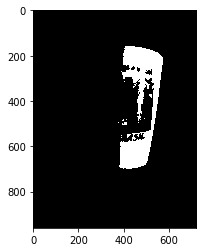

In [282]:
plt.imshow(binary_min,cmap='gray',norm=NoNorm())

# Teste

In [28]:
from skimage.filters import sobel
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from scipy import ndimage as ndi
from skimage import morphology

In [249]:
elevation_map = np.uint8(sobel(image)*255 > 20)*255

In [250]:
elevation_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

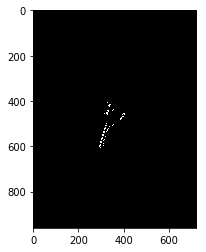

In [251]:
plt.imshow(elevation_map,cmap='gray',norm=NoNorm())

(array([6.81029e+05, 7.91000e+03, 9.08000e+02, 4.27000e+02, 2.33000e+02,
        2.25000e+02, 2.29000e+02, 1.47000e+02, 8.00000e+01, 1.20000e+01]),
 array([ 0. ,  6.6, 13.2, 19.8, 26.4, 33. , 39.6, 46.2, 52.8, 59.4, 66. ]),
 <a list of 10 Patch objects>)

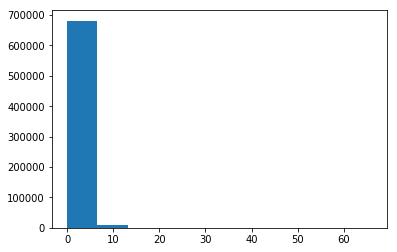

In [223]:
plt.hist(elevation_map.ravel())

In [174]:
kernel = np.ones((5,5),np.uint8)

In [175]:
closing = np.uint8(cv2.morphologyEx(elevation_map, cv2.MORPH_CLOSE,kernel)*255)

In [147]:
closing

array([[11, 11, 11, ...,  8,  8,  8],
       [11, 11, 11, ...,  8,  8,  8],
       [11, 11, 11, ...,  8,  8,  8],
       ...,
       [20, 20, 20, ...,  9,  9,  9],
       [20, 20, 20, ..., 10, 10, 10],
       [20, 20, 20, ..., 10, 10, 10]], dtype=uint8)

In [148]:
closing = np.uint8( closing > closing.min()) * 255

In [149]:
closing

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

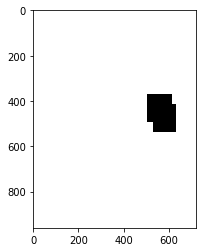

In [150]:
plt.imshow(closing,cmap='gray',norm=NoNorm())

# Radius

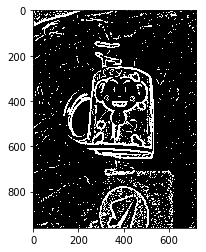

In [19]:
radius = 10
selem =  disk(radius)
local_otsu = rank.otsu(image, selem)
binary_min = np.uint8(image >= local_otsu) * 255
binary_min = np.invert(binary_min)
plt.imshow(binary_min,cmap='gray',norm=NoNorm())

In [20]:
kernel = np.ones((5,5),np.uint8)

In [21]:
opening = cv2.morphologyEx(binary_min, cv2.MORPH_OPEN, kernel)

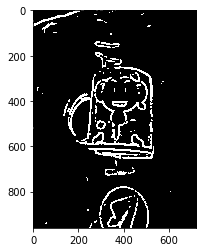

In [22]:
plt.imshow(opening,cmap='gray',norm=NoNorm())

In [25]:
filling = ndi.binary_fill_holes(opening)

In [41]:
cleaned = morphology.remove_small_objects(filling, 100)

In [42]:
cleaned = np.uint8(cleaned*255)

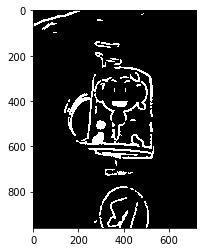

In [43]:
plt.imshow(cleaned,cmap='gray',norm=NoNorm())

In [50]:
kernel = np.ones((40,40),np.uint8)

In [51]:
closing = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)

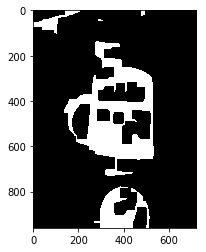

In [52]:
plt.imshow(closing,cmap='gray',norm=NoNorm())

# Teste 2